# 03. Neural Networks for Images03. Neural Networks for Images

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.transform import resize

import tensorflow as tf
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPool2D, GlobalAveragePooling2D, Reshape, Resizing, Rescaling, Add
from keras.models import Sequential, Model
from keras.datasets import cifar10
from keras.applications import vgg19, resnet50

Messy data - not in 4th normal form in DB terms

Segmentation - find where the object is. Draw a contour like around it.

## Main ways of feature extraction in DNN when working with unstructured data

1. Convolutions - we will talk about this today (and a bit for encoiders-decoders)
2. Attension - next time
3. Gates - next time

## The old way

If we have an image dataset with images with sizes 1000x2000 pixels we get the following bytes: $2000 * 1000 * 3 = 6,000,000$.

That is 6 million bytes per image and if we train it the old way which is each pixel is a feature we get the following model:

In [6]:
model = Sequential([
    Input((2000 * 1000 * 3,)),
    Dense(20, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(80, activation = "relu"),
    Dense(100, activation = "relu")
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 20)             │   120,000,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 80)             │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │         8,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,009,210 (457.80 MB)

 Trainable params: 120,009,210 (457.80 MB)

 Non-trainable params: 0 (0.00 B)

We see 120 million parameters for the first dense layer.\
We see there is no such issue on the following layers, but the first one is a problem.\
This makes it so that the first layers is doing all the work in a way. It is million of times more complex than the other layers.\
We have a DEEP NN, but actually the first layers is doing the work, the rest are kind of useless.

If we want to increase the params of the 1st layer from 20 to 200 or more this 10x the already huge 1st layer. Probably will get out of memory error.

These 6 million pixels are not independent. We can't represent them in this way, because it assumes they are independent (from standard ML)

We need a better approach for images.

Lets get an example. How many features/object do we see in this image?

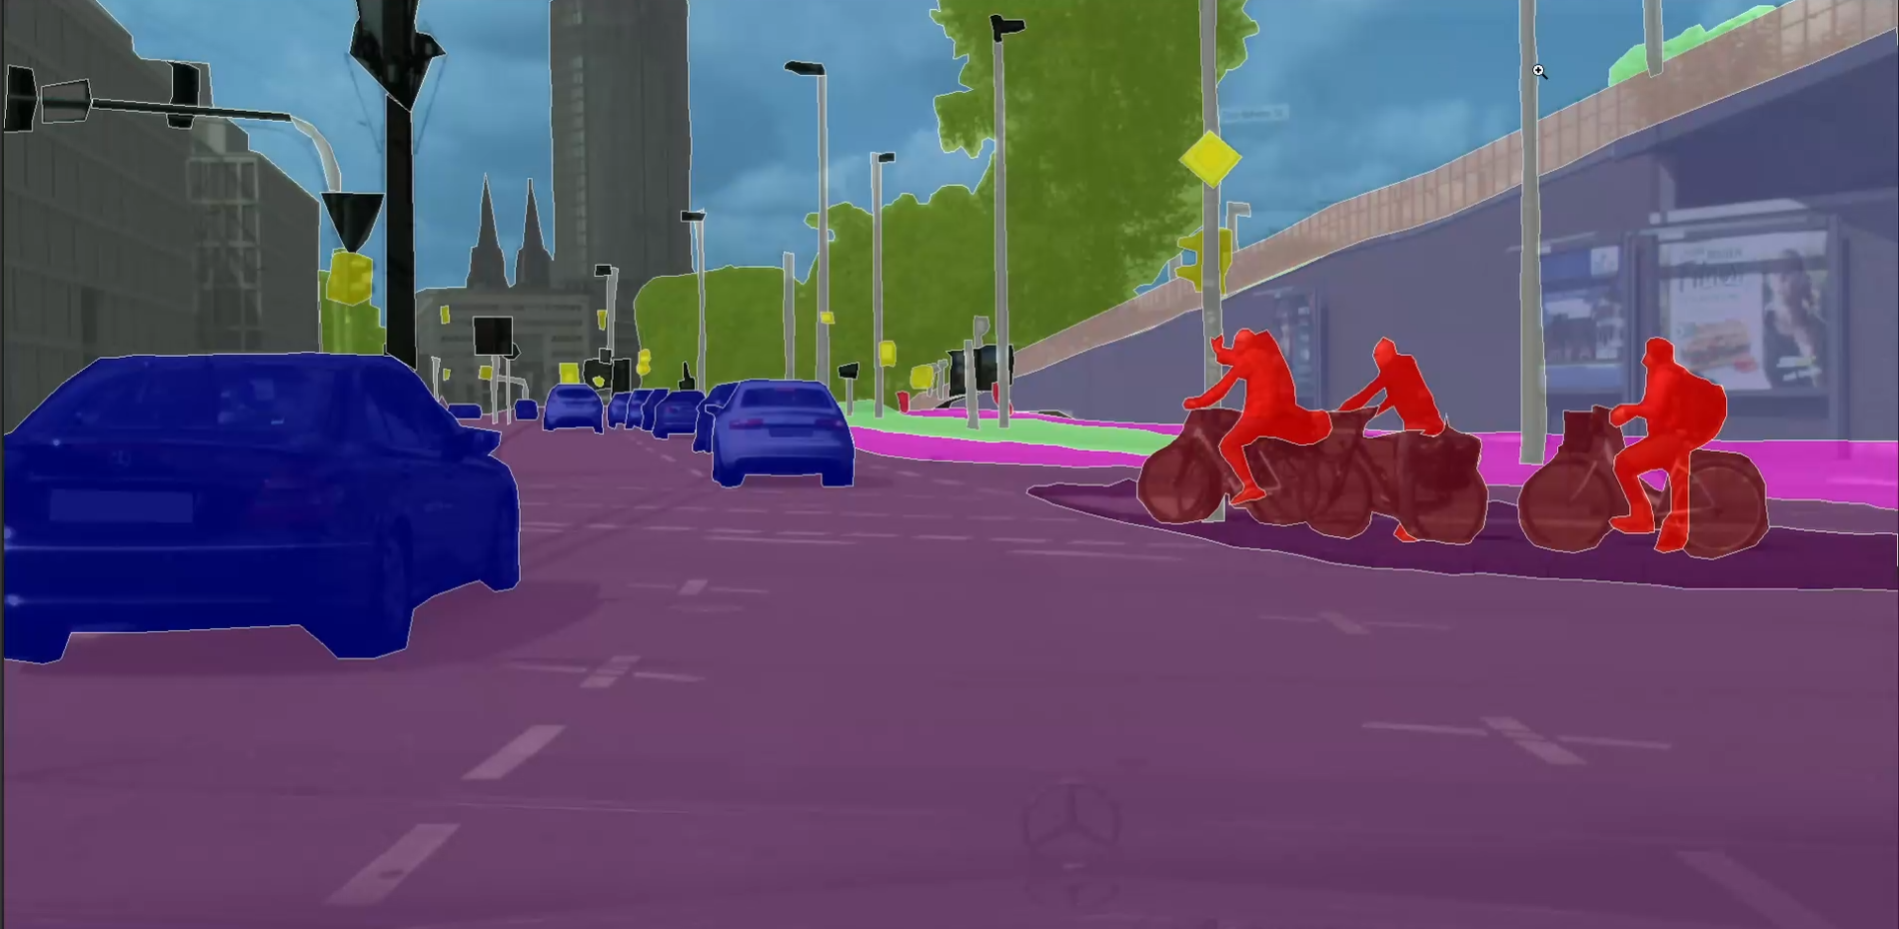

There are colours, textures, contrast, etc. The human brain can process around 1000/2000 params from this image.\
When we look at it we see objects, colours etc. We don't see individual pictures. We need this kind of approach for DNN with images.

These characteristics are not independent.

## Convolution

We combine an image with a filter(small matrix) and produce a new image.

### Example

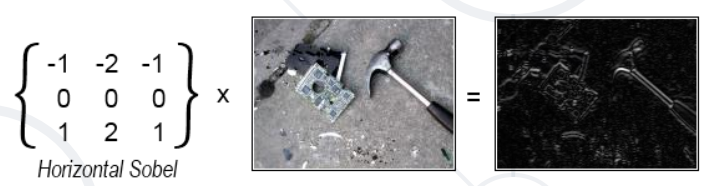

### Definition:

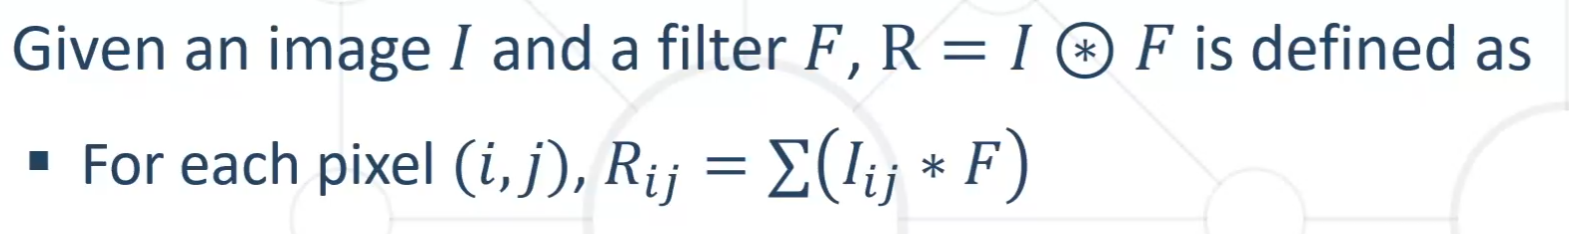

The F convolutional matrix (kernal) is usually square with odd rank (
so that is has a central pixel) 

### The sliding window

We use the sliding window method to apply the kernal matrix pixel by pixel to get the output. Technically it is called [Cross-correlation](https://en.wikipedia.org/wiki/Cross-correlation) but we call it **Convolution**

We multiply the kernal matrix by the pixels in the window and get the sum. We save that in the output image as the result for that particular pixel.

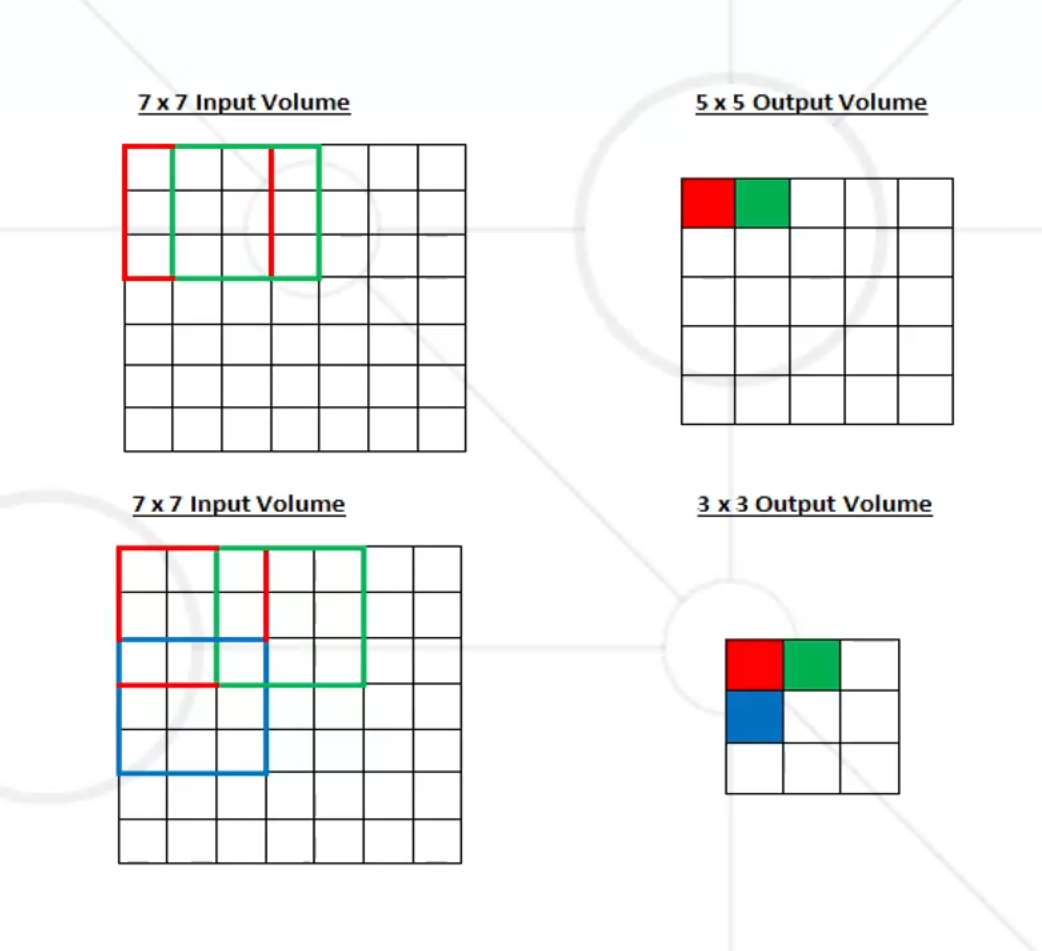

Key points:
- We want the filter to be small
    - If it is too big, it means it is doing too many things at the same time
    - It is good to be of odd rank (3, 5, 7) This way we have a central pixel. And that is where we can set the new value of the convulution in the output image.
- Input Volume - the pixels in the input image, Output Volume - the pixels in the output image after the convolution.
  -  We can see the output is smaller by R pixels on each side, where $ R = Rank(kernal) / 2$
    -  If it is 3x3 then we remove a pixel on each side
    -  If it is 5x5 then we remove 2 pixels on each side
    -  The bigger the kernal the bigger the volume loss
- Stride - How many pixels we should skip. The step size. The sliding step. We can move the window with 1,2,3,...n, but it makes the output volume even smaller. Usually we use 1 as value.
- The more we apply the convolution, the more volume we have in the output image

#### Padding

The convolution operation always decreases the output volume. Usually we do this operation again and again on each layer. This will make the result tiny. So we add padding pixels on the side, so that the output volume remains the same as the input volume

**Valid Padding** - does nothing 7x7 -> 5x5\
**Same padding** - the input and output volume remain the same 7x7 -> 7x7
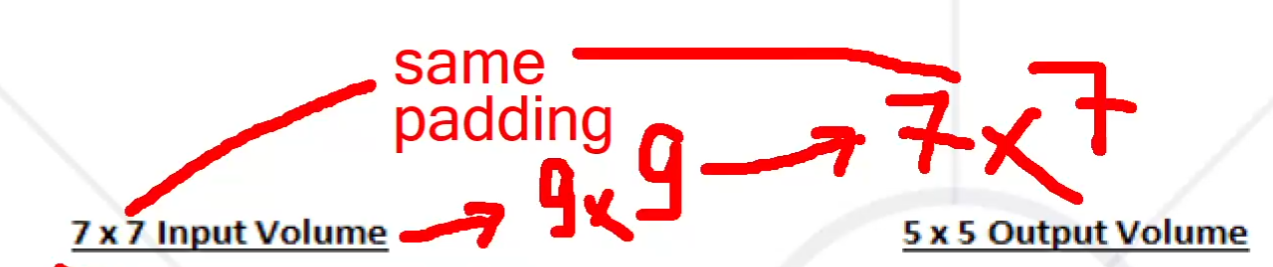

The first application of the 0,0 pixel has to look like this then:

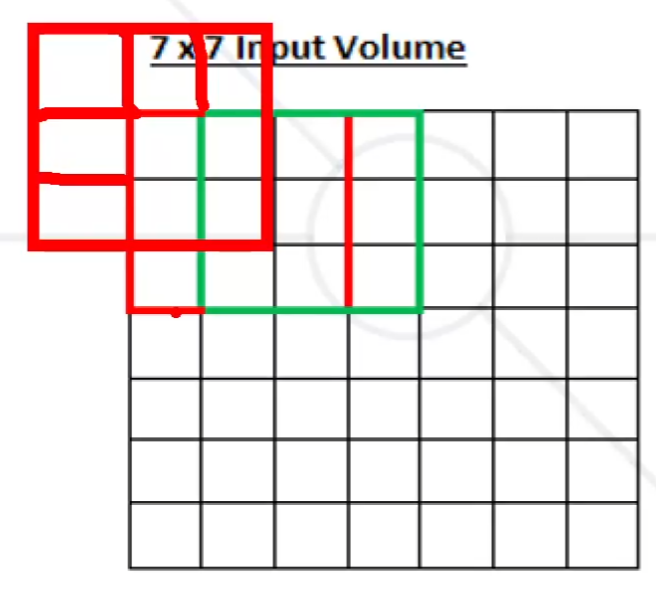

Many ways to add padding:
- Copy the frame pixels and add them around the edge again.
    - 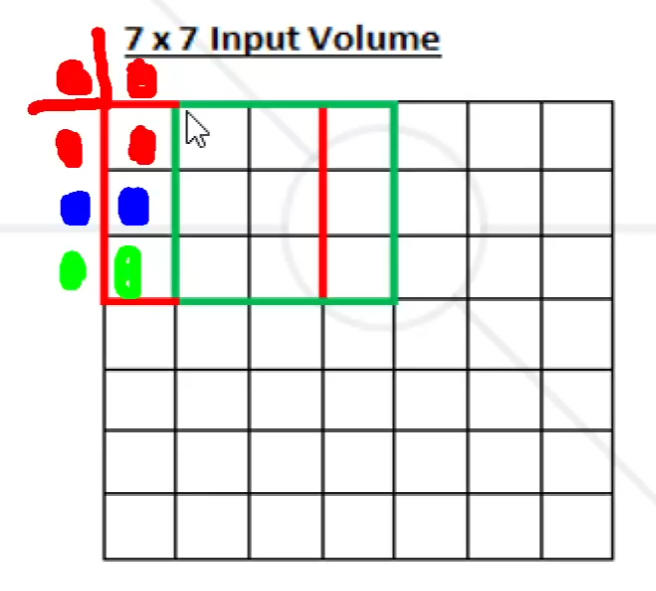
- Fill with zeroes
- Fill with the opposite pixel (tiling)
    - 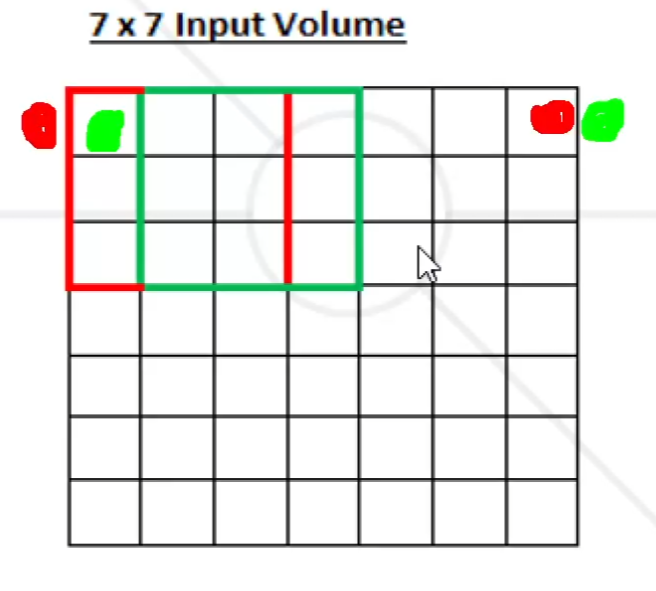 

#### Checking Dimensions
In DNN we have to make sure the dimenstions match up. So always check if they align after a convolution
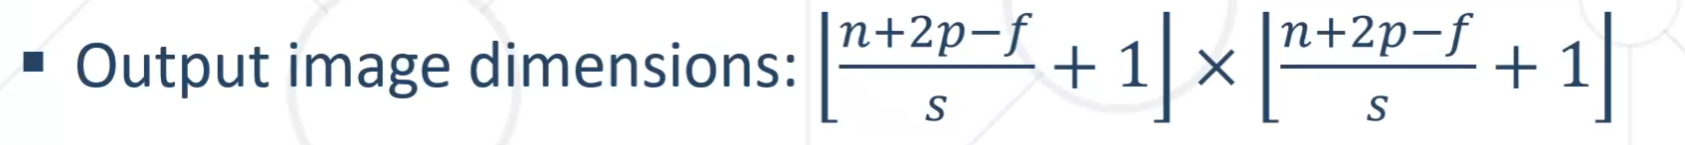

#### Multiple channels in image and convolution

An image usually  has 3 channels for Red, Green and Blue.

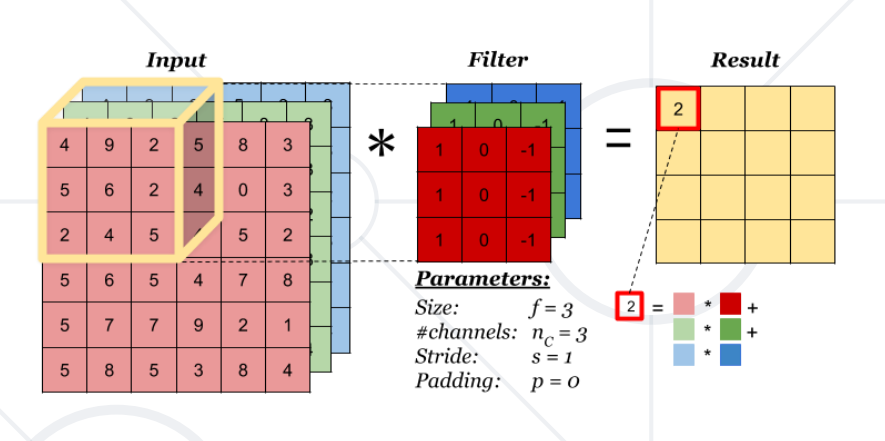

When we apply a convolution we multiply:
- Red filter * Red channel = A
- Green filter * Green channel = B
- Blue filter * Blue channel = C
- A + B + C = the output pixel
- The result is not 3 channels, its only 1, look at the picture

Channels bring additional information for the same positional objects. The object is still there but we see different things about it thought different channels. Satelite iamages have 16 infrared channels.

### Convolutional Layers

In its current form we can't just plug this in a NN. We need:
- An activation function
- A bias term

Why?

**Because convolution is a linear operation. I only contains addition and multiplication. We need an activation fucntion to make it non linear, just like the Dense() layers**

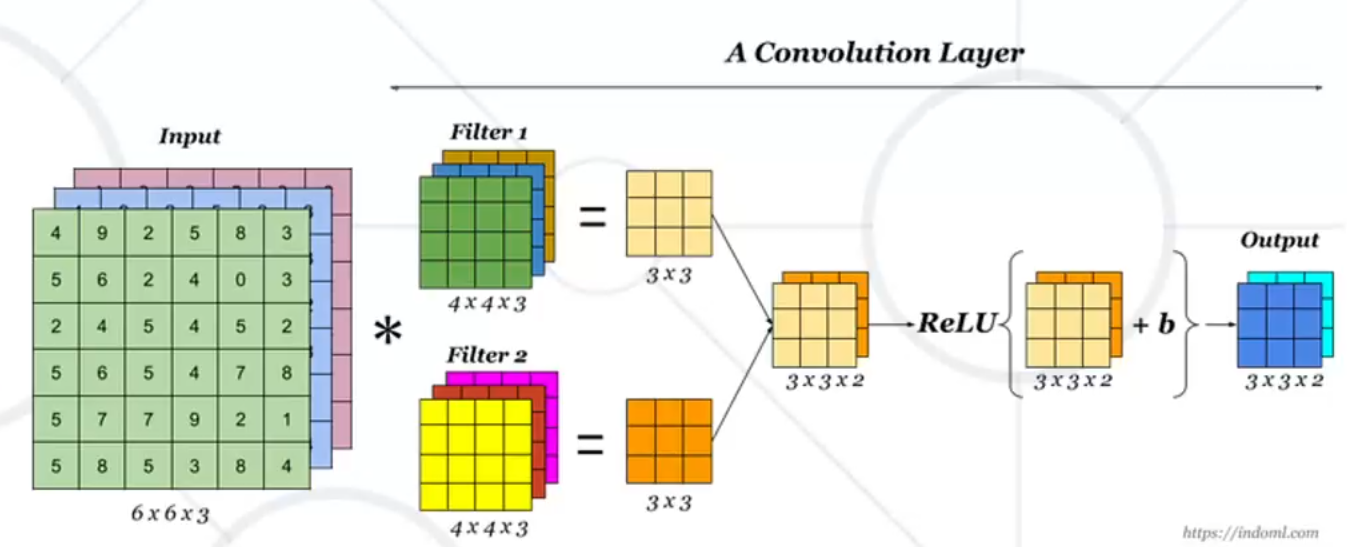

Convolutional Layers resemble Dense layers:
- Weights vs Filters
- The neurons/filters are not connected internally in the layer
- We are teaching the weights/values inside the filters
- Bias and activation function

What we can do with Dense we can also do with Convolutional.

So what is the benefit?

We are apply the **SAME** kernal/filter to the whole image.

Example: If we have a car either top right or bottom right it doent matter. If we have a filter that understands cars and we apply it to the whole image with the sliding window it will find all cars. We can't do that with Dense

Convolutions can find the object no matter where it is in the image. This means Neural networks are invariant towards Translation. Meaning it doesn't affect them.

In [12]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

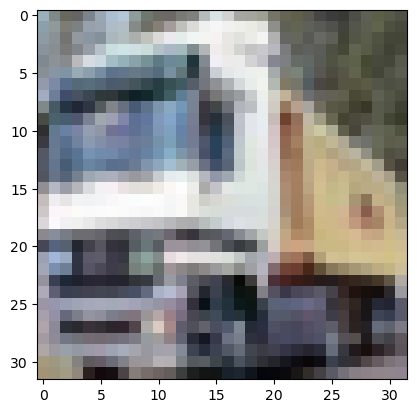

In [17]:
plt.imshow(X_train[1])

Conv layers in Tensorflow:
- Conv1D is used usually for Audio Singals or Text
- Conv2D is for images
- Conv3D is for 3D images or video (N 2D images, N is the 3rd dimension ( time I guess )

In [20]:
cnn_model = Sequential([
    Input((32, 32, 3)),
    Conv2D(filters = 17, kernel_size = (3,3))
])

In [21]:
cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 17)     │           476 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 476 (1.86 KB)

 Trainable params: 476 (1.86 KB)

 Non-trainable params: 0 (0.00 B)

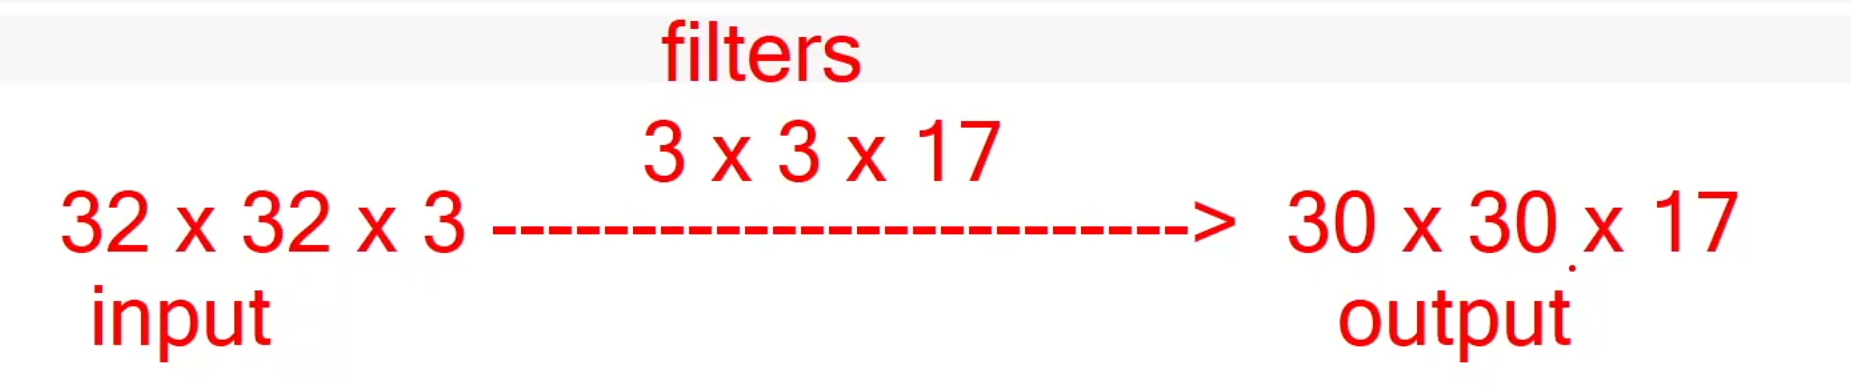

#### Feature map
The result of a layer is usually called activation. In Convolutional Layers we call it also **feature map**

In [25]:
dcnn_model = Sequential([
    Input((32, 32, 3)),
    Conv2D(filters = 17, kernel_size = (3,3), padding = "same", activation = "relu"),
    Conv2D(filters = 12, kernel_size = (3,3), padding = "same", activation = "relu"),
    Conv2D(filters = 10, kernel_size = (3,3), padding = "same", activation = "relu"),
    Conv2D(filters = 5, kernel_size = (3,3), padding = "same", activation = "relu")
])
dcnn_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 17)     │           476 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 12)     │         1,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 10)     │         1,090 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 5)      │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,869 (15.11 KB)

 Trainable params: 3,869 (15.11 KB)

 Non-trainable params: 0 (0.00 B)

The results of the layers are not images anymore. Think of them as maps of features. They tell us what is where.

So far this model does nothing useful really. It just understands images. We need to put a dense layer at the end of it and then we can classify the objects we understand.

In [48]:
dense_model = Sequential([
    Input((32, 32, 3)),
    Conv2D(filters = 17, kernel_size = (3,3), padding = "same", activation = "relu"),
    Conv2D(filters = 15, kernel_size = (3,3), padding = "same", activation = "relu"),
    Conv2D(filters = 12, kernel_size = (3,3), padding = "same", activation = "relu"),
    MaxPool2D(),
    Conv2D(filters = 10, kernel_size = (3,3), padding = "same", activation = "relu"),
    Conv2D(filters = 8, kernel_size = (3,3), padding = "same", activation = "relu"),
    Conv2D(filters = 8, kernel_size = (3,3), padding = "same", activation = "relu"),
    MaxPool2D(),
    Conv2D(filters = 6, kernel_size = (3,3), padding = "same", activation = "relu"),
    Conv2D(filters = 5, kernel_size = (3,3), padding = "same", activation = "relu"),
    #Flatten(),
    GlobalAveragePooling2D(),
    Dense(40, activation = "relu"),
    Dense(20, activation = "relu"),
    Dense(10, activation = "softmax")
])

In [49]:
dense_model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 32, 32, 17)     │           476 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 32, 32, 15)     │         2,310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 32, 32, 12)     │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 16, 16, 10)     │         1,090 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 16, 16, 8)      │           728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 16, 16, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 8, 8, 6)        │           438 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 8, 8, 5)        │           275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 5)              │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 40)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,803 (34.39 KB)

 Trainable params: 8,803 (34.39 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
dense_model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

It is kind of like standart ML. The Convolutional part of the model is the feature extraction that gives us a vector and then we give it to a classifier - the Dense layers here.

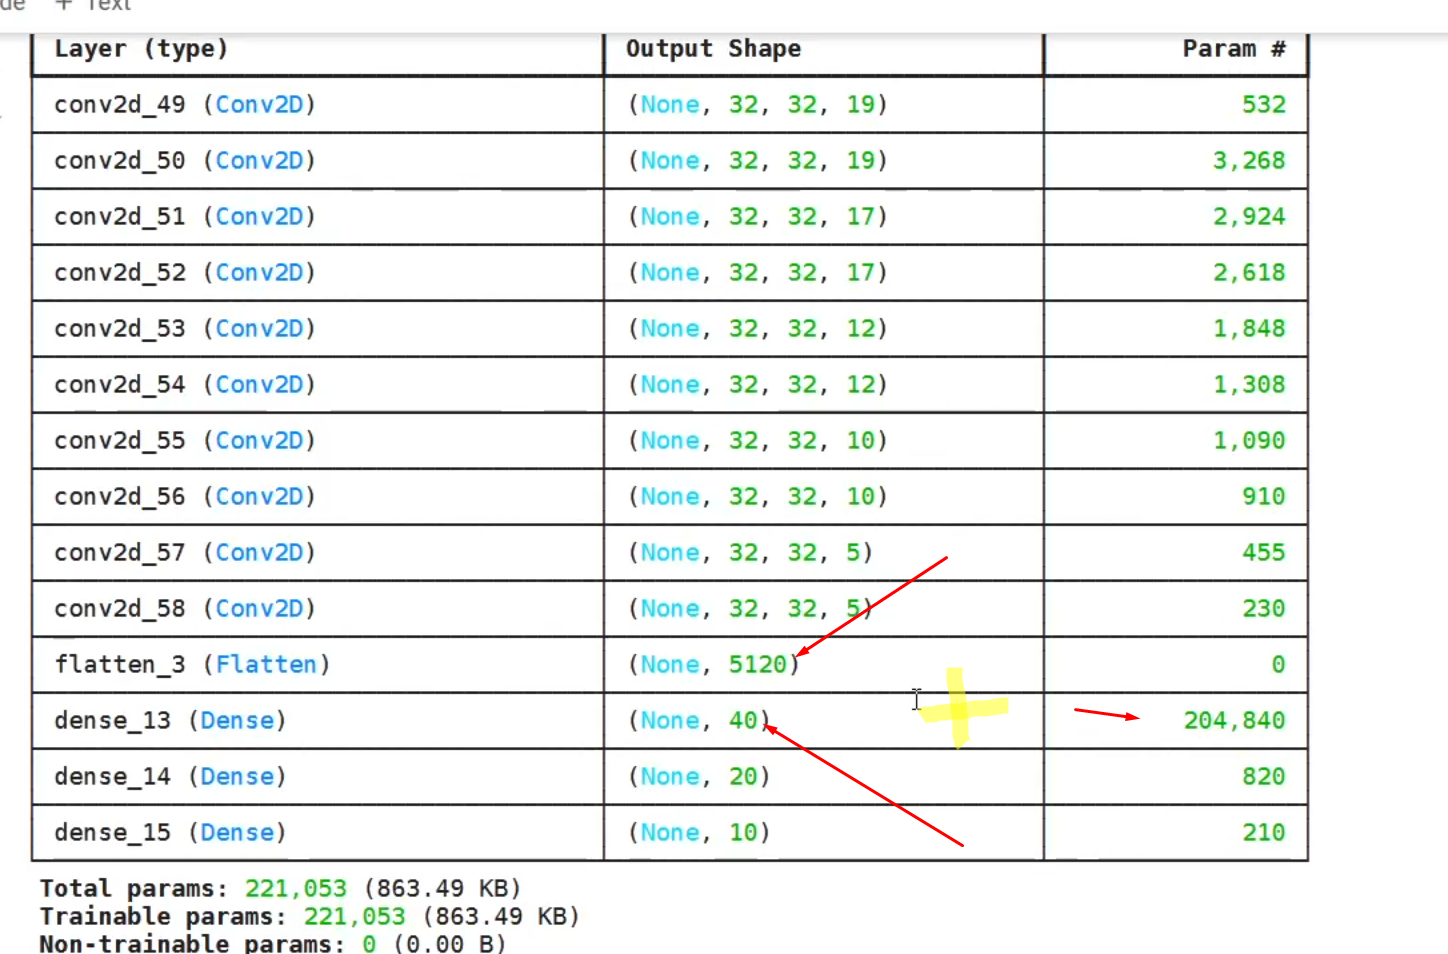

Here we can see that we still have the issue with too many params focused on a single layer. To battle this we can:
- tweak the output params of the Flatten layer before it
- tweak the Dense() layer's neurons

We have a lot of layers with 32x32 images, it looks like if it was an ensamble of models we would try to do **Dimentionality Reduction**

## Pooling

Pooling is the Dimentionality reduction for images. \
It is applied in blocks, not sliding windows (It is kind of like sliding window 2x2 with step 2, or 3x3 with step 3, The windows/blocks just dont overlap)

We aggregate the 4 blocks and we half the volume of the image\
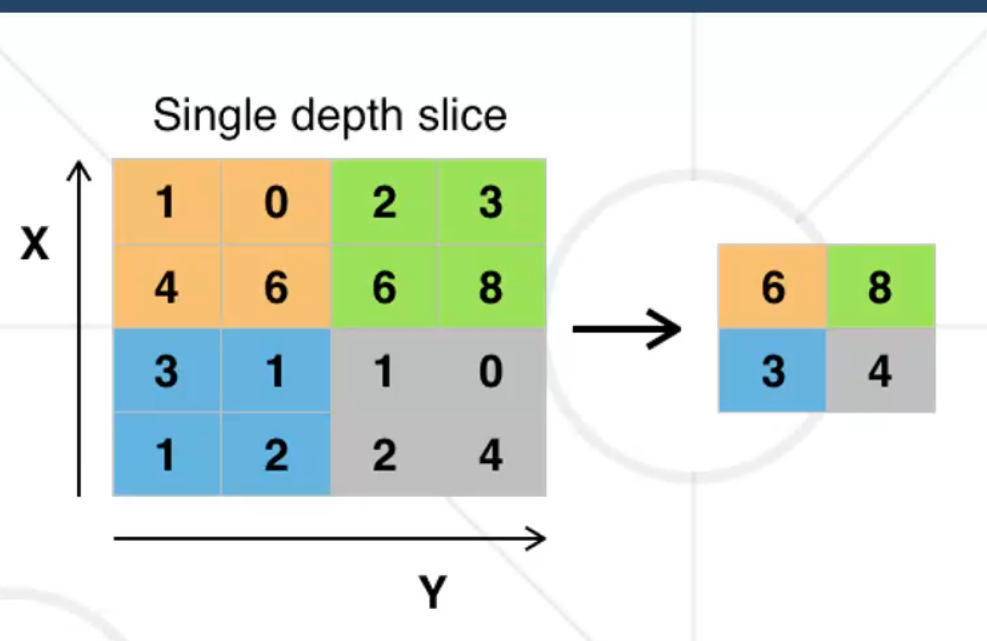

#### Max-pooling
We have to choose which operation we will aggregate with. Most often we choose **MAX**, that is why it is called **max-pooling**

It is wrong to put MaxPooling after a single Conv2D. It is too much. Doesn't really do anything useful.

The default max-pool block is (2,2) which means it halfs each dimention, which means it reduces the **VOLUME** 4 times.

## GlobalAveragePooling2D

An alternative to Flatten(), it does aggregation by the last channel. If we have (8,8,5) instead of like MaxPool2D to create blocks and reduce the image for the first 2 channels, we do an aggregation( max, avg, etc.) on the last channel.

When the channels are few GlobalAveragePooling2D might lose some data, so we use Flatten. But when they are alot we can use it.

In [52]:
dense_model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3631 - loss: 1.6491
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4180 - loss: 1.5215
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4614 - loss: 1.4361
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4906 - loss: 1.3602
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5191 - loss: 1.3020
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5346 - loss: 1.2638
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5417 - loss: 1.2434
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5599 - loss: 1.1951
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5703 - loss: 1.1782
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5712 - loss: 1.1716


In [53]:
dense_model.fit(X_train, y_train, epochs = 20)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5816 - loss: 1.1452
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5886 - loss: 1.1268
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5943 - loss: 1.1101
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5970 - loss: 1.1009
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6004 - loss: 1.0917
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6046 - loss: 1.0840
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6057 - loss: 1.0817
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6107 - loss: 1.0665
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6180 - loss: 1.0607
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6129 - loss: 1.0533
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6249 - loss: 1.0320
Epoch 12/20
1563/1563 ━━━━━━━━

In [54]:
dense_model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6380 - loss: 0.9949
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6383 - loss: 0.9922
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6405 - loss: 0.9843
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6360 - loss: 0.9964
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6441 - loss: 0.9763
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6390 - loss: 0.9848
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6471 - loss: 0.9701
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6469 - loss: 0.9705
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6484 - loss: 0.9681
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6492 - loss: 0.9686
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6496 - loss: 0.9673
Epoch 12/50
1563/1563 ━━━━━━━━

## Why do Convolutions work?

- They are equivalent to Fully Connected NN, but they also allow us to understand what object we are seeing without knowing where it is.
- Low dimentinal inputs (the params don't explode)
- [Paper](https://cs.nyu.edu/~fergus/papers/zeilerECCV2014.pdf)

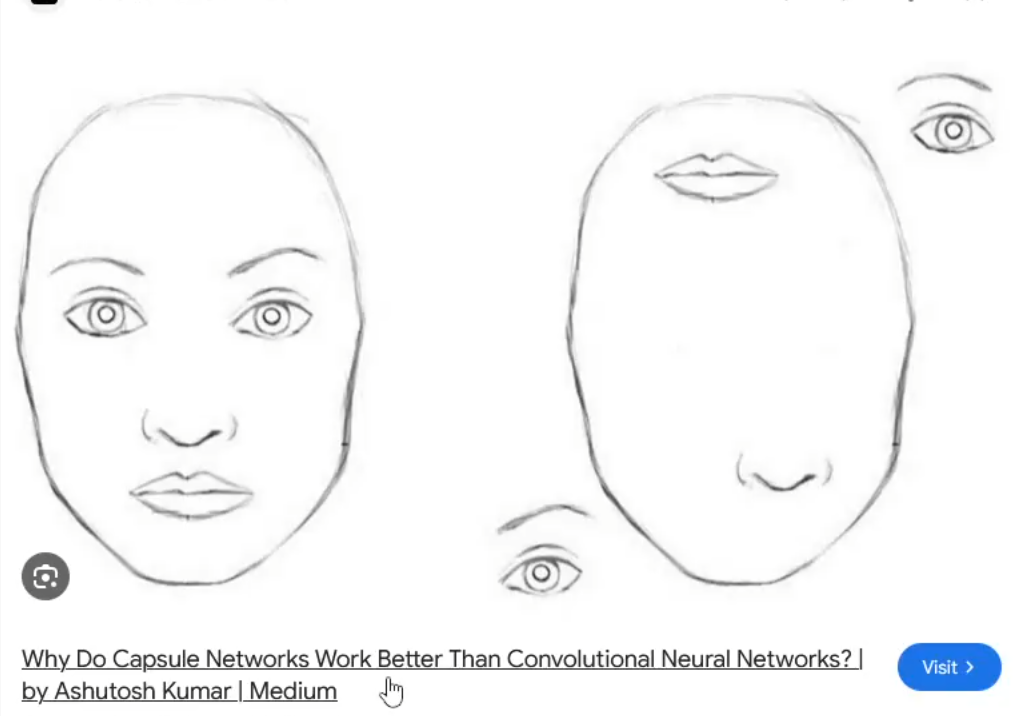 

in this case it will recognize both images as faces because of translational invariance.

*Capsule Networks are too hard to train, so we won't look into them

Dilated Convolutions - look into not neighbouring pixels:\
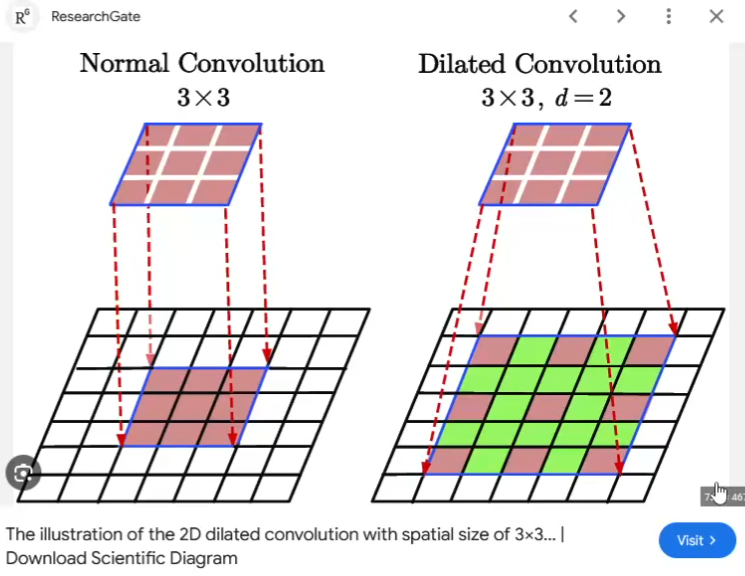

Used for images that are too big that we know not every pixel is as important.

## Let's look and see how we can use already trained models

In [58]:
vgg_model = vgg19.VGG19()

574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


In [59]:
vgg_model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,31

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 143,667,240 (548.05 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
preprocessed = vgg19.preprocess_input(X_train[0:10])

In [62]:
preprocessed.shape

(10, 32, 32, 3)

We see our image dataset has 32x32 images, but the model expects 224x224. We need to do upsampling. Used to go from low pixel to high pixel count. Or we can just use another image :P

In [67]:
cat_image = imread("pictures/cat.jpeg")

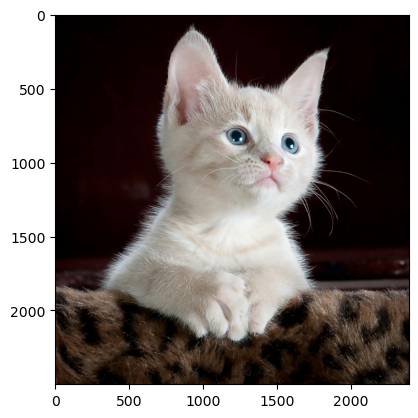

In [68]:
plt.imshow(cat_image)

In [70]:
vgg19.preprocess_input(cat_image).shape

(2500, 2392, 3)

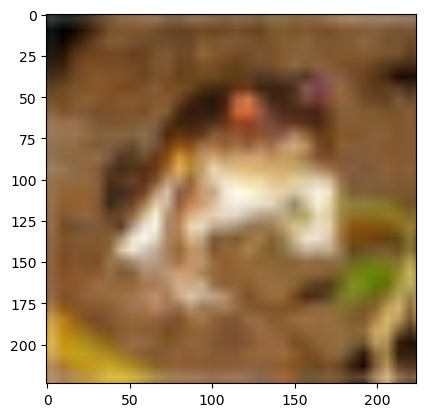

In [81]:
plt.imshow(resize(X_train[0], (224,224), preserve_range = True).astype(np.uint8))

In [82]:
images = np.array([resize(X_train[0], (224,224), preserve_range = True).astype(np.uint8) for i in range(50)])

In [83]:
images.shape

(50, 224, 224, 3)

In [87]:
preprocessed_images = vgg19.preprocess_input(images) # This function doesnt resize. Dunno why. Weird. We had to do it ourselves

In [88]:
preprocessed_images.shape

(50, 224, 224, 3)

In [91]:
predictions = vgg_model.predict(preprocessed_images)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


In [92]:
vgg19.decode_predictions(predictions)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n03347037', 'fire_screen', 0.12202384),
  ('n04443257', 'tobacco_shop', 0.03520029),
  ('n03871628', 'packet', 0.022939334),
  ('n07590611', 'hot_pot', 0.020755954),
  ('n01773549', 'barn_spider', 0.020654943)],
 [('n03347037', 'fire_screen', 0.12202384),
  ('n04443257', 'tobacco_shop', 0.03520029),
  ('n03871628', 'packet', 0.022939334),
  ('n07590611', 'hot_pot', 0.020755954),
  ('n01773549', 'barn_spider', 0.020654943)],
 [('n03347037', 'fire_screen', 0.12202384),
  ('n04443257', 'tobacco_shop', 0.03520029),
  ('n03871628', 'packet', 0.022939334),
  ('n07590611', 'hot_pot', 0.020755954),
  ('n01773549', 'barn_spider', 0.020654943)],
 [('n03347037', 'fire_screen', 0.12202384),
  ('n04443257', 'tobacco_shop', 0.03520029),
  ('n03871628', 'packet', 0.022939334),
  ('n07590611', 'hot_pot', 0.020755954),
  ('n01773549', 'barn_spider', 0.020654943)],
 [('n03347037', 'fire_screen', 0.12202384),
  ('n04443257', 'tobacco_shop', 0.03520029),
  ('n03871628', 'packet', 0.022939334),
  ('n07

Not the best of results, but low quality pictures + not that great model = this

## Seems to be working for the cat kind of

In [97]:
resized_cat_image = np.array([resize(cat_image, (224,224), preserve_range = True)])
preprocessed_cat_image = vgg19.preprocess_input(resized_cat_image)
cat_prediction = vgg_model.predict(preprocessed_cat_image)
vgg19.decode_predictions(cat_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


[[('n02124075', 'Egyptian_cat', 0.65084106),
  ('n02123045', 'tabby', 0.1548948),
  ('n02123159', 'tiger_cat', 0.068924114),
  ('n02127052', 'lynx', 0.028875208),
  ('n03085013', 'computer_keyboard', 0.022036953)]]

## Keras-CV

A library that is separate for now, but is in the process to join KerasHub.

It is a Keras extension that allows you do different magic like things with Computer Vision:
- Special Layers
    - Data augmentation
    - Feature pyramid
    - Spacial Pyramid
    - Visual Transformer
- Trained Models
    - Object detection
    - Classification - Image/Video
    - Clip model - working with video and text
- Keypoints - object detection - detect a hand and its position for example
- Augmentation functions
    - Contrast
    - Channel shuffle
    - Fourier

## Generalizations and Explansions

Neural networks have 2 usages:
1. Train a model for a specific task - just like in standart ML 
3. Pre-training and fine-tuning process
   - Pre-training - take large model and train it for many things at the same time
       - Usually classification
       - Separation of concerns - A company like Google, AWS, FB can use their massive datasets and resources to pre-train really good **"feature-extractor"** / **foundational** models which then people can fine-tune for their specific tasks
   - Fine-tuning

Transfer learning - teach it a specific task and use it for a similar one is a common practice as well.

### Residual Networks (ResNets)

Deeper networks allow us to compute complex functions (have higher model capacity). Problem is:
- They are diffictult to train (vanishing gradients)
- The validation error inceases (not by overfitting)
    - 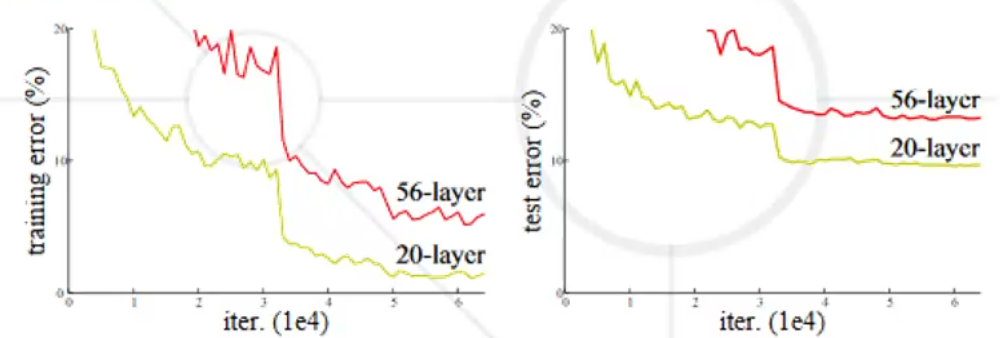
    - Here we see the more complex model doing worse due to vanishing gradients problem on the testing but as well as on the **training** set
    - The bigger the model the more chains in the chain rule, the bigger the chance of this issue.

Solution: shortcut connections (ResNets)
- Pass thje activation skipping 1 or more layers
- Reason: the identity function $ y = x $ is really easy to learn
    - 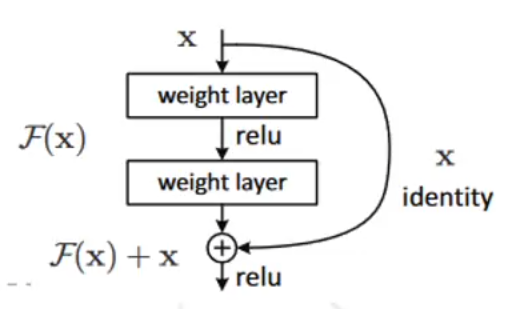
    - residual connection / skip connection.
    - We pass the identity (meaning we don't do anything additional to the input, kind of like reminding the model if the vanishing gradients problem occured in the layers inbetween)
 
Results:
- ImageNet
- 18/34 layers
    - 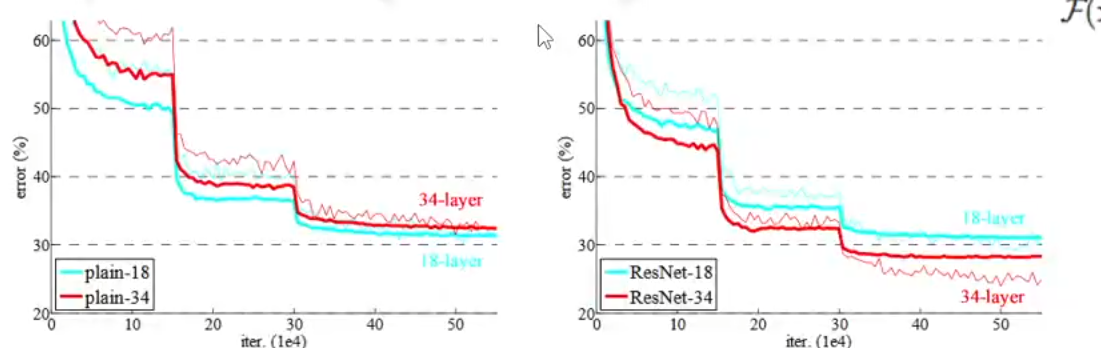
    - Here we see:
        - On the left - plain net with the same problem, the more complex model 34 is doing worse than the more simple one 18
        - On the right - Implemented residual connections and the roles reversed 
- Runtime: faster than VGG
    - Because it has less params (Works faster)
    - Better model (Less error)

In [98]:
tf.keras.backend.clear_session()

In [103]:
resnet50.ResNet50().summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [104]:
resized_cat_image = np.array([resize(cat_image, (224,224), preserve_range = True)])
preprocessed_cat_image = resnet50.preprocess_input(resized_cat_image)
cat_prediction = resnet50.ResNet50().predict(preprocessed_cat_image)
resnet50.decode_predictions(cat_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


[[('n02124075', 'Egyptian_cat', 0.64760727),
  ('n02127052', 'lynx', 0.11254897),
  ('n02123045', 'tabby', 0.063291654),
  ('n02123159', 'tiger_cat', 0.027789071),
  ('n02123394', 'Persian_cat', 0.021729529)]]

Meh the same results :/


Here is the residual connection

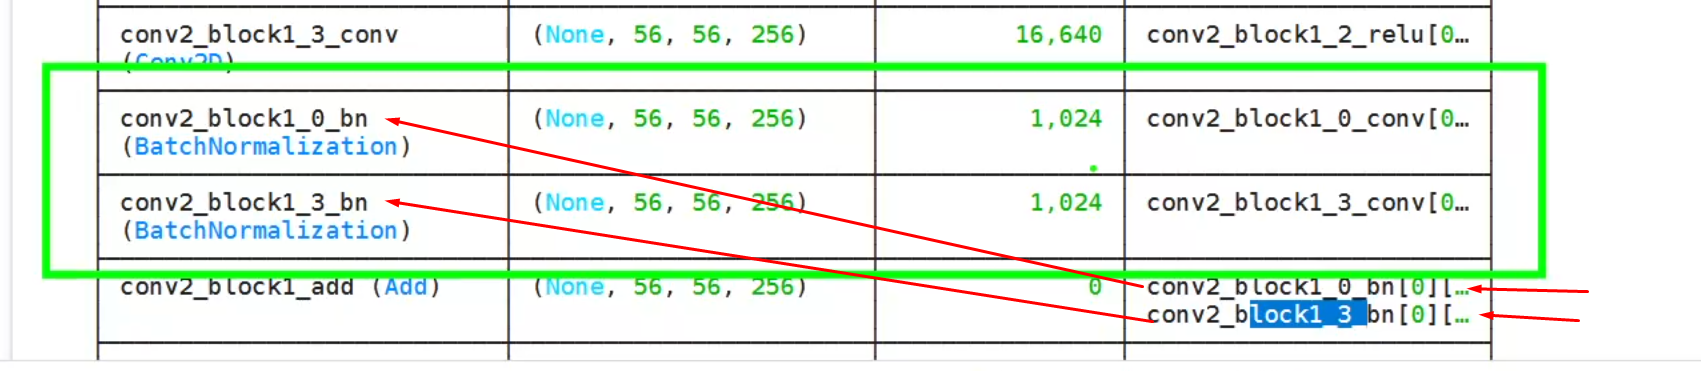

In [109]:
inputs = Input((224, 224, 3))
conv1 = Conv2D(20, (3,3), activation = "relu", padding = "same")(inputs)
conv2 = Conv2D(20, (3,3), activation = "relu", padding = "same")(conv1)
conv3 = Conv2D(20, (3,3), activation = "relu", padding = "same")(conv2)
conv4 = Conv2D(20, (3,3), activation = "relu", padding = "same")(conv3)

add_result = Add()([conv1, conv4]) # The sahapes of conv1 and conv4 need to be the same, so we add padding = "same"

residual_block = Model(inputs = inputs, outputs = add_result)


In [110]:
residual_block.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 224, 224,  │        560 │ input_layer_5[0]… │
│                     │ 20)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 224, 224,  │      3,620 │ conv2d_8[0][0]    │
│                     │ 20)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 224, 224,  │      3,620 │ conv2d_9[0][0]    │
│                     │ 20)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 224, 224,  │      3,620 │ conv2d_10[0][0]   │
│                     │ 20)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 224, 224,  │          0 │ conv2d_8[0][0],   │
│                     │ 20)               │            │ conv2d_11[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 11,420 (44.61 KB)

 Trainable params: 11,420 (44.61 KB)

 Non-trainable params: 0 (0.00 B)